### <b><span style='color:#FFCE30'> 2.1 |</span> Load</b>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10
%matplotlib inline

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [4]:
# Load the CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Exploring the dataset
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [5]:
print('Train Images Shape:      ', x_train.shape)
print('Train Labels Shape:      ', y_train.shape)

print('\nTest Images Shape:       ', x_test.shape)
print('Test Labels Shape:       ', y_test.shape)

Train Images Shape:       (50000, 32, 32, 3)
Train Labels Shape:       (50000, 1)

Test Images Shape:        (10000, 32, 32, 3)
Test Labels Shape:        (10000, 1)


### <b> 2.2 |</span> Explore</b>

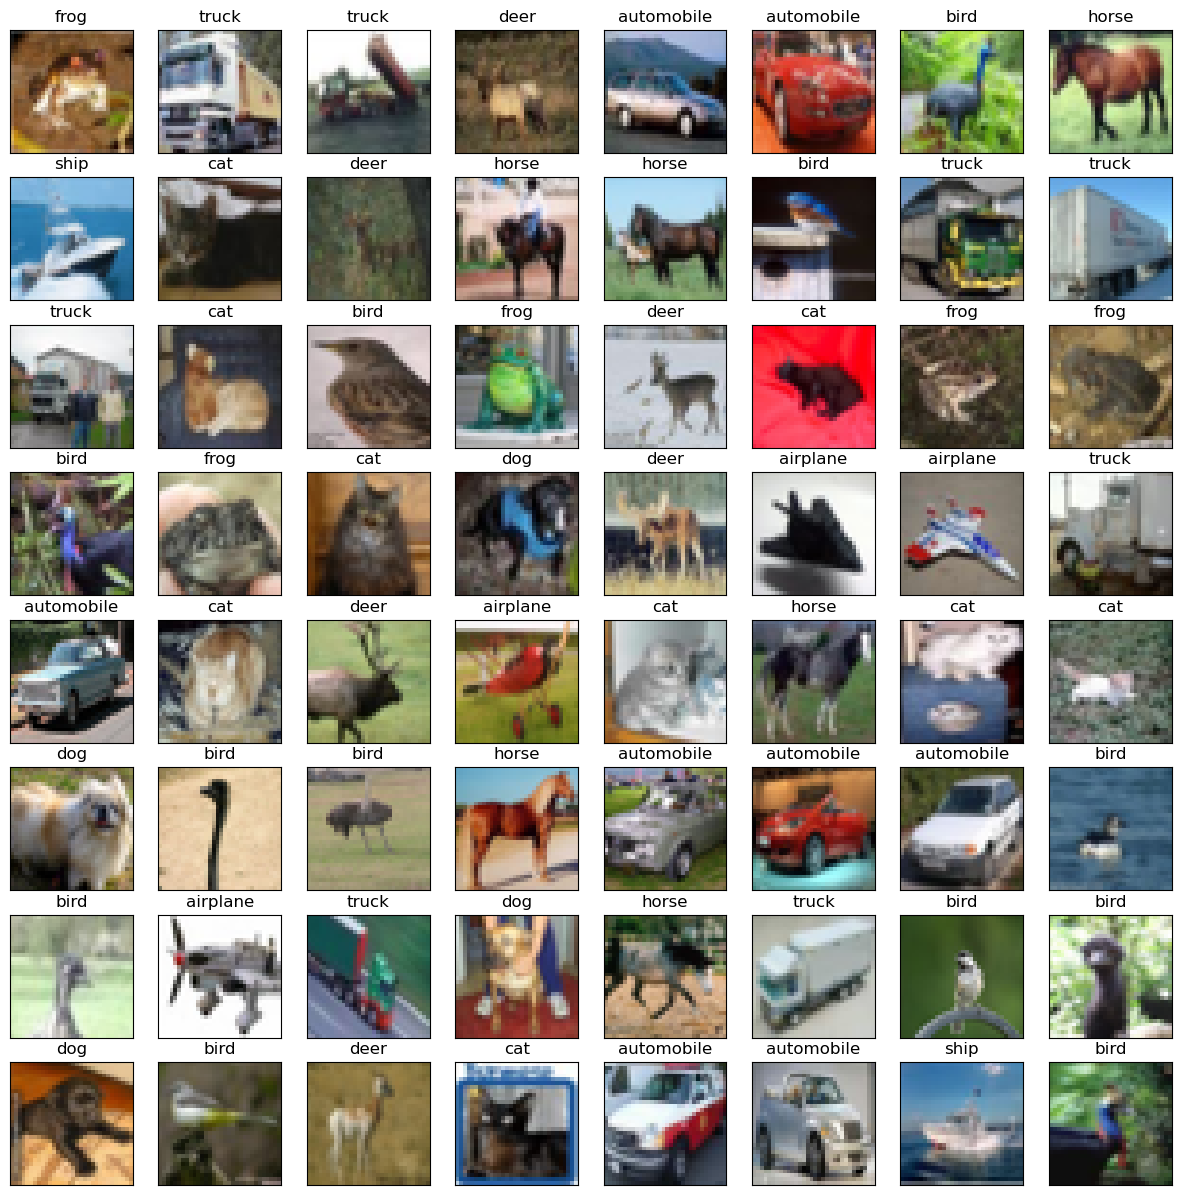

In [6]:
# Exploring the CIFAR-10 dataset with and overview

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
               
# Create a new figure
plt.figure(figsize=(15,15))

# Loop over the first 25 images
for i in range(64):
    # Create a subplot for each image
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Display the image
    plt.imshow(x_train[i])

    # Set the label as the title
    plt.title(class_names[y_train[i][0]], fontsize=12)

# Display the figure
plt.show()

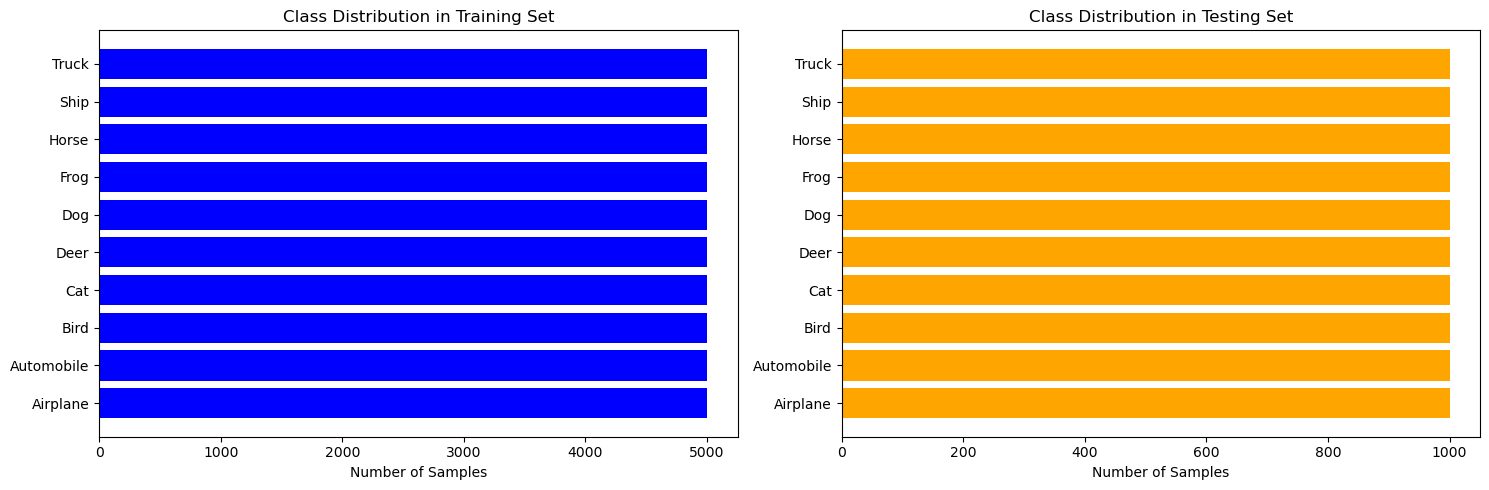

In [7]:
# Define class names
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Get class distribution for training and testing sets
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)

# Set figure size and create subplots
plt.figure(figsize=(15, 5))

# Plot class distribution for training set
plt.subplot(1, 2, 1)
plt.barh(classes_name, train_counts, color='blue')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Training Set')

# Plot class distribution for testing set
plt.subplot(1, 2, 2)
plt.barh(classes_name, test_counts, color='orange')
plt.xlabel('Number of Samples')
plt.title('Class Distribution in Testing Set')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

###  3.1.1 </span> Normalization to [0,1] IN mlp</b>


In [8]:
# Method 1: Normalization to [0,1] using Min-Max Scaling
x_train_min = np.min(x_train)
x_train_max = np.max(x_train)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

###  3.2 |</span> Normalization to [-1,1] (Standardisation)</b>

In [10]:
# Method 2: Normalization to [-1,1] following a Normal Distribution
x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std
x_test_standardized = (x_test - x_train_mean) / x_train_std

### <b> 4.1 |</span> Dataset Preparation</b>


In [12]:
# Flatten the images
x_train_flat = x_train_normalized.reshape(x_train_normalized.shape[0], -1)
x_test_flat = x_test_normalized.reshape(x_test_normalized.shape[0], -1)

# Display the shape of flattened images
print("Flattened Training Images Shape:", x_train_flat.shape)
print("Flattened Testing Images Shape:", x_test_flat.shape)

Flattened Training Images Shape: (50000, 3072)
Flattened Testing Images Shape: (10000, 3072)


### <b>4.2 |</span> Model Architecture</b>


In [13]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model") 

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### <b> 4.3 |</span> Training</b>


In [14]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=10,  
                    batch_size=128,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.2711 - loss: 2.1670 - val_accuracy: 0.3348 - val_loss: 1.8574
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.3745 - loss: 1.7612 - val_accuracy: 0.3992 - val_loss: 1.7088
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4107 - loss: 1.6681 - val_accuracy: 0.4194 - val_loss: 1.6611
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4309 - loss: 1.6174 - val_accuracy: 0.4488 - val_loss: 1.5844
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.4499 - loss: 1.5600 - val_accuracy: 0.4438 - val_loss: 1.5750
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.4591 - loss: 1.5302 - val_accuracy: 0.4482 - val_loss: 1.5553
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.4718 - loss: 1.5018 - val_accuracy: 0.4726 - val_loss: 1.5180
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.4789 - loss: 1.4793 - val_acc

### <b>4.4 |</span> Evaluation</b>

<span style="color: blue;">
The model's performance on the CIFAR-10 test set is as follows:

- Test Loss: 1.50
- Test Accuracy: 0.477 (47.7%)

### 4.5 |</span> Hyperparameter Tuning</b>




In [16]:
# Define the MLP model architectures
def create_mlp_model_1():
    model = tf.keras.models.Sequential([
              
        # Hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_2():
    model = tf.keras.models.Sequential([
                
        # Hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

def create_mlp_model_3():
    model = tf.keras.models.Sequential([
               
        # First hidden layer with 256 neurons and ReLU activation
        tf.keras.layers.Dense(256, activation='relu', input_shape=(3072,)), # 3072 = 32x32x3
        
        # Second hidden layer with 128 neurons and ReLU activation
        tf.keras.layers.Dense(128, activation='relu'),
        
        # Output layer with softmax activation for multi-class classification
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model


In [17]:
# Compile and train the model
def compile_and_train_model(model):
    # Compile the model
    optimizer = Adam()  # Use Adam optimizer
    model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    # Train the model on the CIFAR-10 training set
    history = model.fit(x_train_flat, y_train,
                        epochs=10,  
                        batch_size=128,  
                        validation_split=0.1)  # Use 10% of training data as validation

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)


In [19]:

# Create and train models
print("MLP Model with one hidden layer (128 neurons):")
mlp_model_1 = create_mlp_model_1()
compile_and_train_model(mlp_model_1)

print("\nMLP Model with one hidden layer (256 neurons):")
mlp_model_2 = create_mlp_model_2()
compile_and_train_model(mlp_model_2)

print("\nMLP Model with two hidden layers (256 and 128 neurons):")
mlp_model_3 = create_mlp_model_3()
compile_and_train_model(mlp_model_3)

MLP Model with one hidden layer (128 neurons):
Epoch 1/10
352/352 [==============================] - 3s 6ms/step - loss: 1.9633 - accuracy: 0.3043 - val_loss: 1.8076 - val_accuracy: 0.3680
Epoch 2/10
352/352 [==============================] - 2s 6ms/step - loss: 1.7776 - accuracy: 0.3752 - val_loss: 1.7821 - val_accuracy: 0.3632
Epoch 3/10
352/352 [==============================] - 2s 6ms/step - loss: 1.7254 - accuracy: 0.3888 - val_loss: 1.7120 - val_accuracy: 0.3954
Epoch 4/10
352/352 [==============================] - 2s 5ms/step - loss: 1.6686 - accuracy: 0.4110 - val_loss: 1.6752 - val_accuracy: 0.4096
Epoch 5/10
352/352 [==============================] - 2s 5ms/step - loss: 1.6333 - accuracy: 0.4250 - val_loss: 1.6431 - val_accuracy: 0.4198
Epoch 6/10
352/352 [==============================] - 2s 5ms/step - loss: 1.6091 - accuracy: 0.4343 - val_loss: 1.6169 - val_accuracy: 0.4252
Epoch 7/10
352/352 [==============================] - 2s 5ms/step - loss: 1.5901 - accuracy: 0.4415 -

In [18]:
# Define the MLP model
model = tf.keras.models.Sequential(name="MLP_model_3layer") 

# Add layers to the model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)))  # 3072 = 32x32x3
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))        
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [19]:
# Compile the model
optimizer = Adam()  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
# Train the model on the CIFAR-10 training set
history = model.fit(x_train_flat, y_train,
                    epochs=20,  
                    batch_size=256,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.2445 - loss: 2.0821 - val_accuracy: 0.3662 - val_loss: 1.7676
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.3723 - loss: 1.7428 - val_accuracy: 0.4064 - val_loss: 1.6771
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4184 - loss: 1.6249 - val_accuracy: 0.4308 - val_loss: 1.5875
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4444 - loss: 1.5544 - val_accuracy: 0.4398 - val_loss: 1.5688
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4611 - loss: 1.5066 - val_accuracy: 0.4712 - val_loss: 1.4901
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4744 - loss: 1.4699 - val_accuracy: 0.4698 - val_loss: 1.5080
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4844 - loss: 1.4431 - val_accuracy: 0.4760 - val_loss: 1.4782
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4953 - loss: 1.4155 - val_accu

###  4.6 |</span> Visually checking the MLP model predictions (51.8% Accuracy)</b>

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


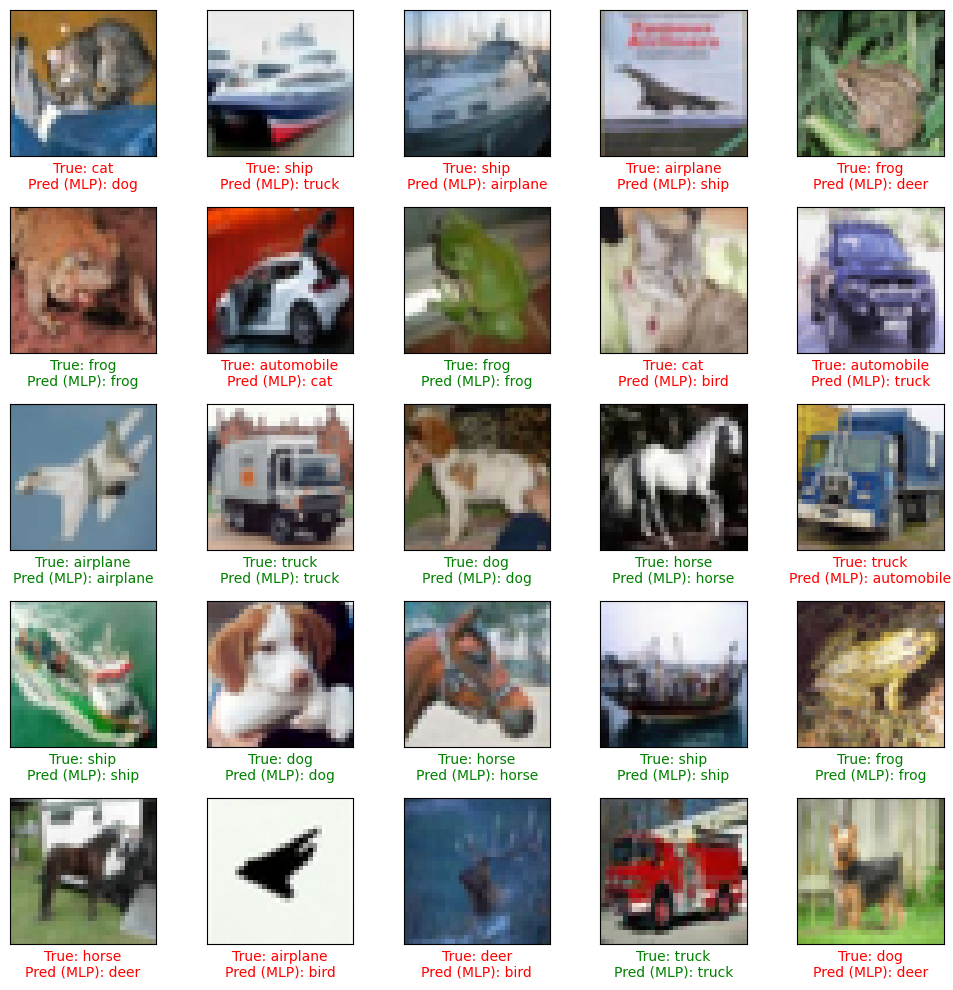

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_mlp = model.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


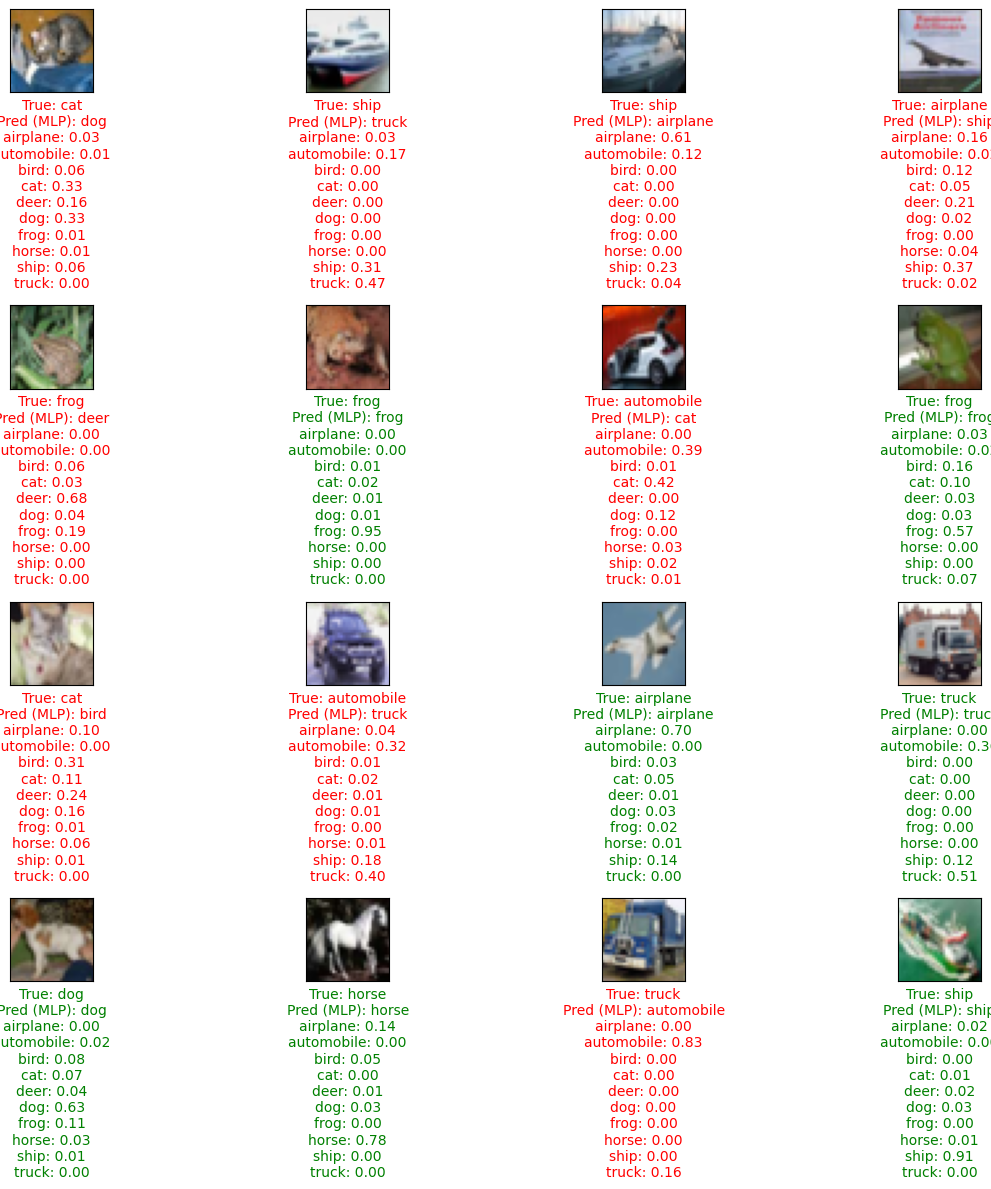

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_mlp = model.predict(x_test_flat)
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

# Plot sample images with predicted labels and probabilities
plt.figure(figsize=(12, 12))
for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]  # Get predicted label
    predicted_probabilities = predictions_mlp[i]  # Get predicted probabilities
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    # Combine label and probabilities for display
    label_with_probabilities = f"True: {true_label}\nPred (MLP): {predicted_label_mlp}\n"
    label_with_probabilities += "\n".join([f"{class_names[j]}: {prob:.2f}" for j, prob in enumerate(predicted_probabilities)])
    plt.xlabel(label_with_probabilities, color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


###  5.1 |</span> Dataset Preparation in CNN</b>
- Load and normalize the CIFAR-10 dataset. 
- Ensure the images are normalized to a range suitable for CNN processing.

In [27]:
# Convert to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the training set
x_train_min = x_train.min(axis=(0, 1, 2), keepdims=True)
x_train_max = x_train.max(axis=(0, 1, 2), keepdims=True)
x_train_normalized = (x_train - x_train_min) / (x_train_max - x_train_min)

# Normalize the test set using training set statistics
x_test_normalized = (x_test - x_train_min) / (x_train_max - x_train_min)

# Display the shapes of the normalized datasets
print("x_train_normalized shape:", x_train_normalized.shape)
print("x_test_normalized shape:", x_test_normalized.shape)

x_train_normalized shape: (50000, 32, 32, 3)
x_test_normalized shape: (10000, 32, 32, 3)


###  5.2 |</span> CNN Architecture</b>
- Design a CNN that includes convolutional layers, activation functions, pooling layers, and fully connected layers. 
- Detail your choice of kernel sizes, pooling sizes, and the architecture's depth.

In [28]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes


### 5.3 |</span> Training</b>
- Compile your CNN with a suitable loss function and optimizer. 
- Utilize techniques such as dropout and batch normalization to prevent overfitting and ensure more stable training.

In [29]:
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential(name="CNN_model")

# Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer to prevent overfitting
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout layer

# Flatten layer to transition from convolutional to dense layers
model.add(layers.Flatten())

# Dense (fully connected) layers with batch normalization and dropout
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Batch normalization layer
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer with 10 classes

# Compile the model with suitable loss function and optimizer
optimizer = Adam(learning_rate=0.0001)  # Use Adam optimizer
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "CNN_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 64)          0 

### <b> 5.4 |</span> Evaluation and Comparison</b>


In [30]:
# Fit the CNN model on the training set
history = model.fit(x_train_normalized, y_train,
                    epochs=10,  
                    batch_size=128,  
                    validation_split=0.1)  # Use 10% of training data as validation

# Evaluate the CNN model on the test set
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
352/352 [==============================] - 127s 341ms/step - loss: 2.1283 - accuracy: 0.2522 - val_loss: 2.0102 - val_accuracy: 0.4102
Epoch 2/10
352/352 [==============================] - 120s 340ms/step - loss: 1.6742 - accuracy: 0.3940 - val_loss: 1.4911 - val_accuracy: 0.4960
Epoch 3/10
352/352 [==============================] - 121s 344ms/step - loss: 1.5081 - accuracy: 0.4580 - val_loss: 1.3823 - val_accuracy: 0.5244
Epoch 4/10
352/352 [==============================] - 121s 344ms/step - loss: 1.3859 - accuracy: 0.5025 - val_loss: 1.2598 - val_accuracy: 0.5620
Epoch 5/10
352/352 [==============================] - 124s 351ms/step - loss: 1.2877 - accuracy: 0.5438 - val_loss: 1.1405 - val_accuracy: 0.6114
Epoch 6/10
352/352 [==============================] - 120s 341ms/step - loss: 1.2079 - accuracy: 0.5736 - val_loss: 1.0757 - val_accuracy: 0.6314
Epoch 7/10
352/352 [==============================] - 120s 342ms/step - loss: 1.1436 - accuracy: 0.5962 - val_loss: 1.0160 -

###  5.5 |</span> Visually checking the model predictions 

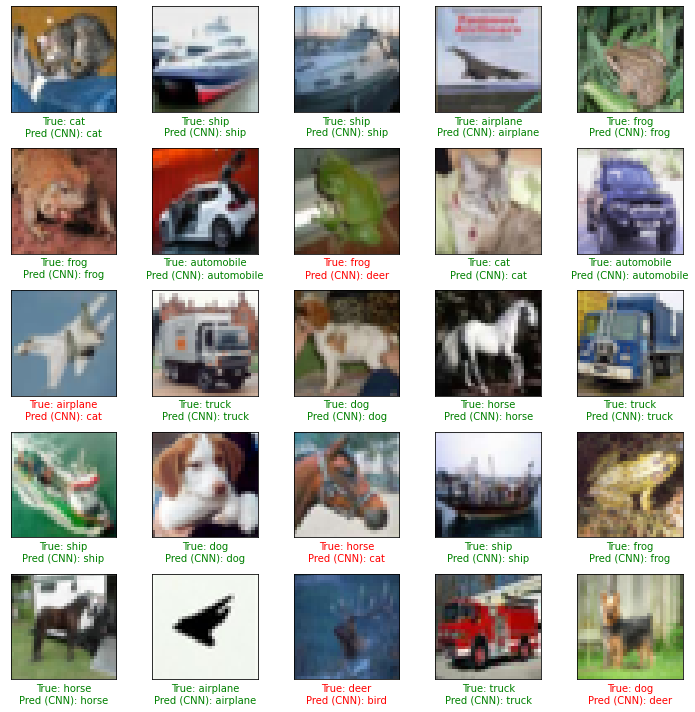

In [32]:
# Get predictions for the test set
predictions_cnn = model.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_cnn[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


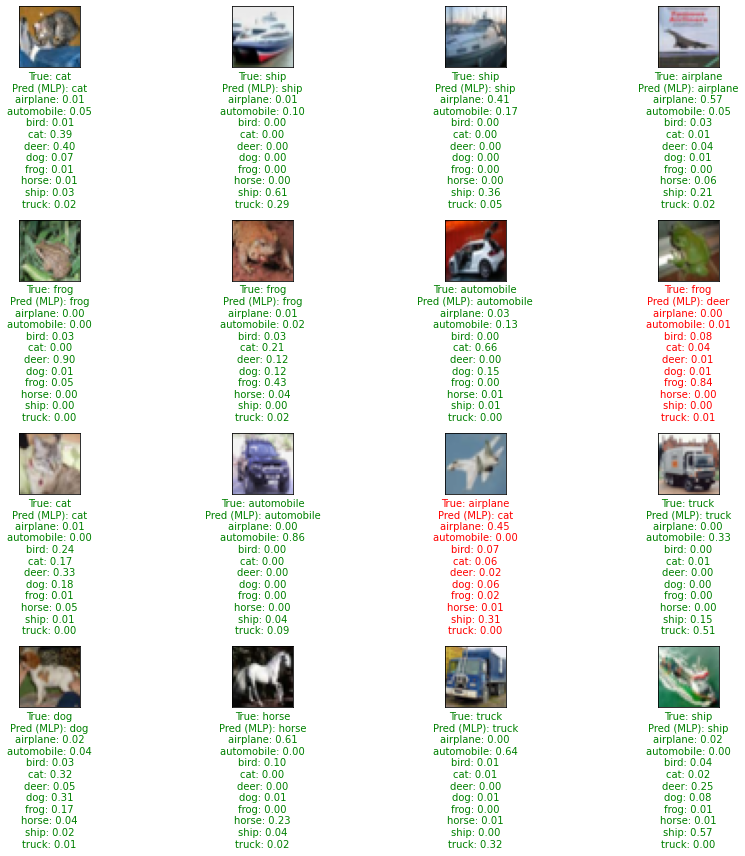

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
predictions_cnn = model.predict(x_test_normalized)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

# Plot sample images with predicted labels and probabilities
plt.figure(figsize=(12, 12))
for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_cnn[i]]  
    predicted_probabilities = predictions_mlp[i]  # Get predicted probabilities
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    # Combine label and probabilities for display
    label_with_probabilities = f"True: {true_label}\nPred (MLP): {predicted_label_mlp}\n"
    label_with_probabilities += "\n".join([f"{class_names[j]}: {prob:.2f}" for j, prob in enumerate(predicted_probabilities)])
    plt.xlabel(label_with_probabilities, color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


### 6.1 |</span> Dataset Preparation in Resnet50</b>
- Load the CIFAR-10 dataset, applying normalization and any required preprocessing to match the input format of the pretrained model.

In [10]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
from sklearn.model_selection import train_test_split

# Preprocess input images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Preprocess input images using ResNet50 preprocessing
x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.1)

from keras.utils import to_categorical

#One hot encode the labels.Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10

y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [13]:
#Print the dimensions of the datasets to check

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((45000, 32, 32, 3), (45000, 10))
((5000, 32, 32, 3), (5000, 10))
((10000, 32, 32, 3), (10000, 10))


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Augmentation Function: Let's define an instance of the ImageDataGenerator class and set the parameters.
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

val_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,)

test_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.1,
    zoom_range=0.1,) 

In [15]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50  # Import ResNet50 model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization, UpSampling2D
from tensorflow.keras.models import Model

# Feature Extraction is performed by ResNet50 pretrained on imagenet weights. 
# Input size is 224 x 224.
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Upsample the input image to match the size expected by ResNet50
resized_inputs = UpSampling2D(size=(7, 7))(inputs)

In [16]:
# Load the ResNet50 model with pretrained weights
resnet_model = ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=resized_inputs  # Use resized input as input tensor
)

# Freeze all layers initially
for layer in resnet_model.layers:
    layer.trainable = False

# Unfreeze the last X layers of the ResNet50 model
NUM_LAYERS_TO_UNFREEZE = 30
for layer in resnet_model.layers[-NUM_LAYERS_TO_UNFREEZE:]:
    layer.trainable = True

# Global average pooling and classification layers
x = GlobalAveragePooling2D()(resnet_model.output)
x = Dense(1024, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.3)(x)  
x = Dense(512, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.2)(x)  
x = Dense(256, activation="relu")(x)
x = BatchNormalization()(x)  
x = Dropout(0.2)(x)  
classification_output = Dense(10, activation="softmax", name="classification")(x)

# Connect the feature extraction and "classifier" layers to build the model
ResNet_model = Model(inputs=inputs, outputs=classification_output, name="ResNet")

# Compile the model
optimizer = tf.keras.optimizers.Adam()  # Use Adam optimizer


#Specify the loss as categorical_crossentropy since the labels are 1 hot encoded. 
#If labels are integer, use sparse categorical crossentropy as loss function.
ResNet_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

ResNet_model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
up_sampling2d (UpSampling2D)    (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           up_sampling2d[0][0]              
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
_____________________________________________________________________________________________

In [17]:
# Count the number of layers
num_layers = len(ResNet_model.layers)
print("Number of layers in the model:", num_layers)

Number of layers in the model: 187


### 6.2 |</span> Evaluation</b>


In [18]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Define a custom ReduceLROnPlateau callback
class CustomReduceLROnPlateau(ReduceLROnPlateau):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def on_train_batch_end(self, batch, logs=None):
        pass

# Add ReduceLROnPlateau callback
reduce_lr = CustomReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_lr=0.00001)

# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Define ModelCheckpoint callback to save the best model weights
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='min')

batch_size=64
epochs=3

history = ResNet_model.fit(train_generator.flow(x_train,y_train,batch_size=batch_size),
                                     epochs=epochs,
                                     steps_per_epoch=x_train.shape[0]//batch_size,
                                     validation_data=val_generator.flow(x_val,y_val,batch_size=batch_size),
                                     callbacks=[reduce_lr, early_stopping, checkpoint],
                                     shuffle = True
                                    )

# Load the best model weights
ResNet_model.load_weights("best_model.h5")

# Evaluate the model
test_loss, test_accuracy = ResNet_model.evaluate(test_generator.flow(x_test,y_test,batch_size=batch_size))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/3
703/703 [==============================] - 5746s 8s/step - loss: 0.7521 - accuracy: 0.7521 - val_loss: 0.6398 - val_accuracy: 0.7956
Epoch 2/3
703/703 [==============================] - 5646s 8s/step - loss: 0.4654 - accuracy: 0.8427 - val_loss: 0.7708 - val_accuracy: 0.7546
Epoch 3/3
157/157 [==============================] - 798s 5s/step - loss: 0.3819 - accuracy: 0.8690
Test Loss: 0.38190656900405884
Test Accuracy: 0.8690000176429749


In [20]:
ResNet_model.save('E:/model_n10/my_modelResnet.h5')

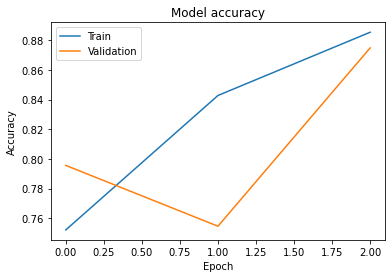

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


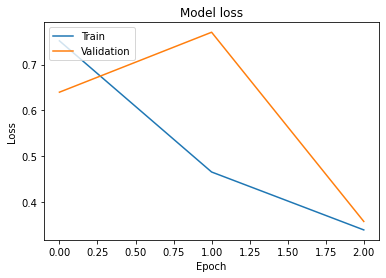

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### <b> 6.4 |</span> Visually checking the model predictions </b>

In [23]:
# Get predictions for the test set
predictions_resnet = ResNet_model.predict(x_test)
predicted_labels_resnet = np.argmax(predictions_resnet, axis=1)

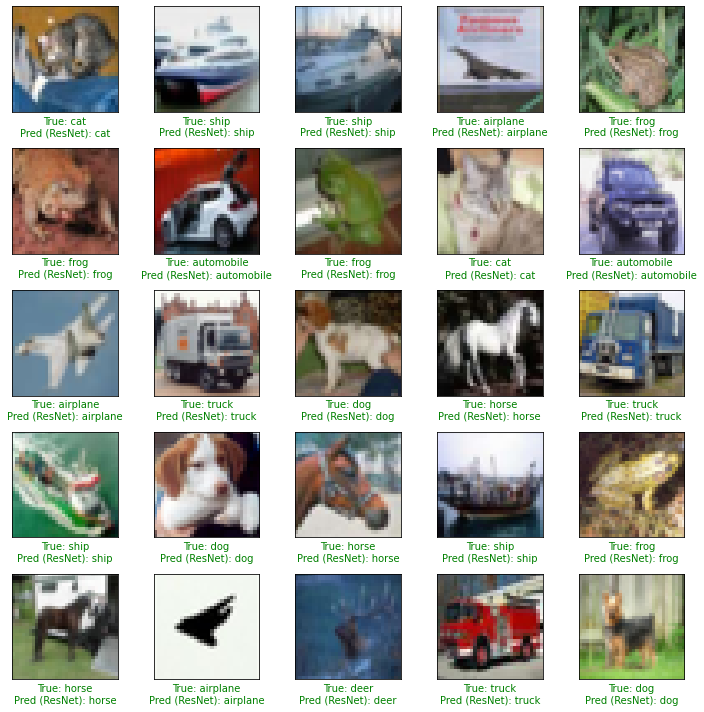

In [28]:
# Plot sample images with predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Adjust as needed
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # Revert preprocessing for visualization by reloading CIFAR-10 dataset
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    plt.imshow(x_test[i])  #Plot original picture
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label = class_names[predicted_labels_resnet[i]]  # Get predicted label
    if true_label == predicted_label:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    plt.xlabel(f"True: {true_label}\nPred (ResNet): {predicted_label}", color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()


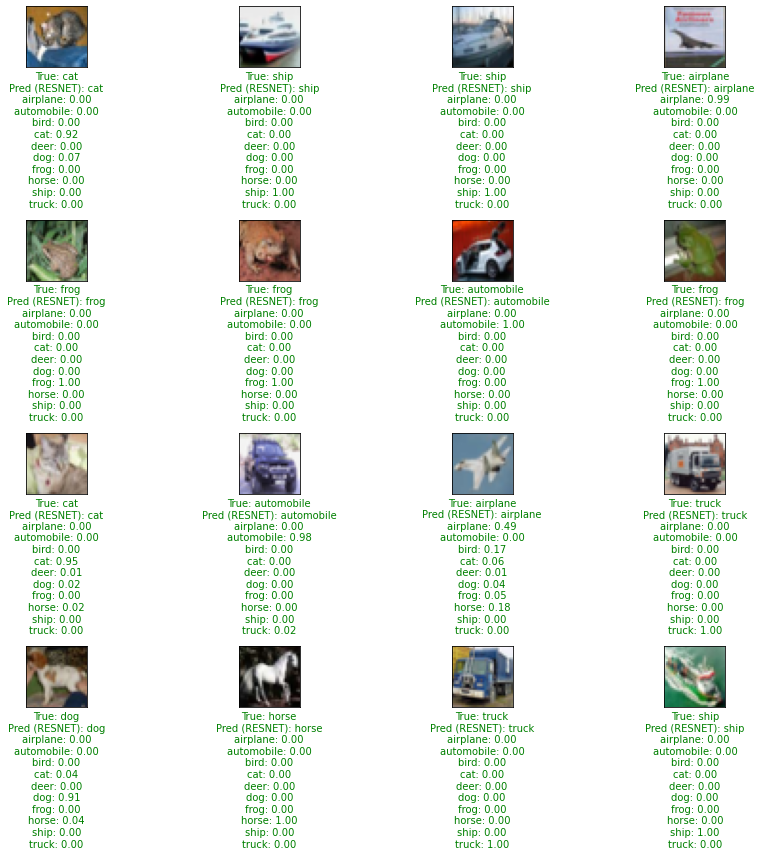

In [30]:
import numpy as np
import matplotlib.pyplot as plt



# Plot sample images with predicted labels and probabilities
plt.figure(figsize=(12, 12))
for i in range(16):  
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])  # Plot original image
    true_label = class_names[y_test[i][0]]  # Get true label
    predicted_label_mlp = class_names[predicted_labels_resnet[i]]  
    predicted_probabilities = predictions_resnet[i]  # Get predicted probabilities
    if true_label == predicted_label_mlp:
        color = 'green'  # Correct prediction
    else:
        color = 'red'  # Incorrect prediction
    # Combine label and probabilities for display
    label_with_probabilities = f"True: {true_label}\nPred (RESNET): {predicted_label_mlp}\n"
    label_with_probabilities += "\n".join([f"{class_names[j]}: {prob:.2f}" for j, prob in enumerate(predicted_probabilities)])
    plt.xlabel(label_with_probabilities, color=color)
plt.tight_layout()  # Adjust subplot layout to prevent overlap
plt.show()